# Import graspi_igraph

Ensure that you are only using python versions higher than 3.7
- Python version can be checked by running *python --version* in the terminal
- it can also be checked on notebook via *!pip --version* in the code section of the notebook

In [2]:
import time

# Helper Functions
---


In [3]:
###########################################################################################
# function that makes csv file of dictionary
###########################################################################################
import csv

def save_dict_to_csv(data_dict, file_name):
    """
    Saves a given dictionary as a CSV file.
    :param data_dict: Dictionary to be saved (keys are filenames, values are nested dictionaries with data)
    :param file_name: Name of the CSV file to be saved (e.g., 'output.csv')
    """
    # Extract headers from the first key
    headers = ["Test File"]  # First column is the file name
    if data_dict:
        sample_key = next(iter(data_dict))
        headers.extend(data_dict[sample_key].keys())
    
    # Write to CSV file
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(headers)  # Write headers
        
        for key, values in data_dict.items():
            row = [key] + [values.get(h, None) for h in headers[1:]]
            writer.writerow(row)  # Write data rows
    
    print(f"CSV file '{file_name}' has been successfully saved.")


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from collections import defaultdict

def format_number(value):
    if value >= 1_000_000:
        return f'{value/1_000_000:.1f}M'
    elif value >= 1_000:
        return f'{value/1_000:.1f}K'
    return f'{value:.0f}'

def group_files_by_pattern(files):
    pattern_groups = defaultdict(list)
    for file in files:
        pattern = re.sub(r'\d+(?:\.\d+)?', '#', file)  # substitute integers and decimals with '#'
        pattern_groups[pattern].append(file)
    return pattern_groups

### function :: draw plot per size


In [5]:

def plot_total_execution_and_memory(csv_file):
    df = pd.read_csv(csv_file)
    df['total_execution_time'] = df['descriptor_time'] + df['graph_time']
    df['peak_memory_usage'] = df[['graph_mem', 'descriptor_mem']].max(axis=1)
    
    pattern_groups = group_files_by_pattern(df['Test File'])
    
    for pattern, files in pattern_groups.items():
        subset = df[df['Test File'].isin(files)].copy()
        subset['size'] = subset['Test File'].str.extract(r'(\d+)').astype(int)
        subset.sort_values('size', inplace=True)
        
        plt.figure(figsize=(12, 10))
        
        # Execution Time Plot
        ax1 = plt.subplot(2, 1, 1)
        ax1.plot(subset['Test File'], subset['total_execution_time'], marker='o', linestyle='-', color='blue', label='Total Execution Time (s)')
        for i, txt in enumerate(subset['total_execution_time']):
            ax1.text(i, txt + max(subset['total_execution_time']) * 0.02, f'{txt:.2f}', ha='center', fontsize=9)
        plt.xlabel('Test Files')
        plt.ylabel('Time (s)')
        plt.title(f'Total Execution Time - {pattern}')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        
        # Memory Usage Plot
        ax2 = plt.subplot(2, 1, 2)
        ax2.plot(subset['Test File'], subset['peak_memory_usage'], marker='s', linestyle='-', color='green', label='Peak Memory Usage (bytes)')
        for i, txt in enumerate(subset['peak_memory_usage']):
            ax2.text(i, txt + max(subset['peak_memory_usage']) * 0.02, format_number(txt), ha='center', fontsize=9)
        plt.xlabel('Test Files')
        plt.ylabel('Memory Usage (bytes)')
        plt.title(f'Peak Memory Usage - {pattern}')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)

        plt.tight_layout(pad=2.0)

        plt.show()



### function :: Draw plot per step

In [6]:
def plot_stepwise_execution_and_memory(csv_file):
    df = pd.read_csv(csv_file)

    # grouping 
    pattern_groups = group_files_by_pattern(df['Test File'])

    for pattern, files in pattern_groups.items():
        subset = df[df['Test File'].isin(files)].copy()
        subset['size'] = subset['Test File'].str.extract(r'(\d+)').astype(float)
        subset.sort_values('size', inplace=True)  # sorting 

        num_files = len(subset)  # number of the files in specific pattern
        cols = 2  # 2 graphs in 1 line
        rows = num_files  

        print(f"Pattern: {pattern}, Total files: {num_files}, Rows: {rows}, Cols: {cols}")

        fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4), squeeze=False)

        bar_width = 0.4

        for i, (_, row) in enumerate(subset.iterrows()):
            row_idx = i  
            col_idx = 0  
            
            print(f"Processing file {row['Test File']} at row {row_idx}")

            # Execution Time Graph
            ax_time = axes[row_idx, col_idx]
            x = np.array([0, 1])  # Graph, Descriptor 
            times = [row['graph_time'], row['descriptor_time']]  

            ax_time.bar(x, times, bar_width, color=['blue', 'red'])
            for j in range(2):
                ax_time.text(x[j], times[j] + max(times) * 0.05, f'{times[j]:.2f}', ha='center', fontsize=9)

            ax_time.set_xticks(x)
            ax_time.set_xticklabels(['Graph', 'Descriptor'])
            ax_time.set_title(f'Time - {row["Test File"]}')
            ax_time.set_ylabel('Time (s)')
            ax_time.grid(True)

            # Memory Usage Graph
            col_idx = 1  
            ax_mem = axes[row_idx, col_idx]
            mems = [row['graph_mem'], row['descriptor_mem']]

            ax_mem.bar(x, mems, bar_width, color=['green', 'purple'])
            for j in range(2):
                ax_mem.text(x[j], mems[j] + max(mems) * 0.05, format_number(mems[j]), ha='center', fontsize=9)

            ax_mem.set_xticks(x)
            ax_mem.set_xticklabels(['Graph', 'Descriptor'])
            ax_mem.set_title(f'Memory - {row["Test File"]}')
            ax_mem.set_ylabel('Memory Usage (bytes)')
            ax_mem.grid(True)

        plt.tight_layout()
        plt.show()

## Visualization function call
---
change the file name if you want to visualize other result


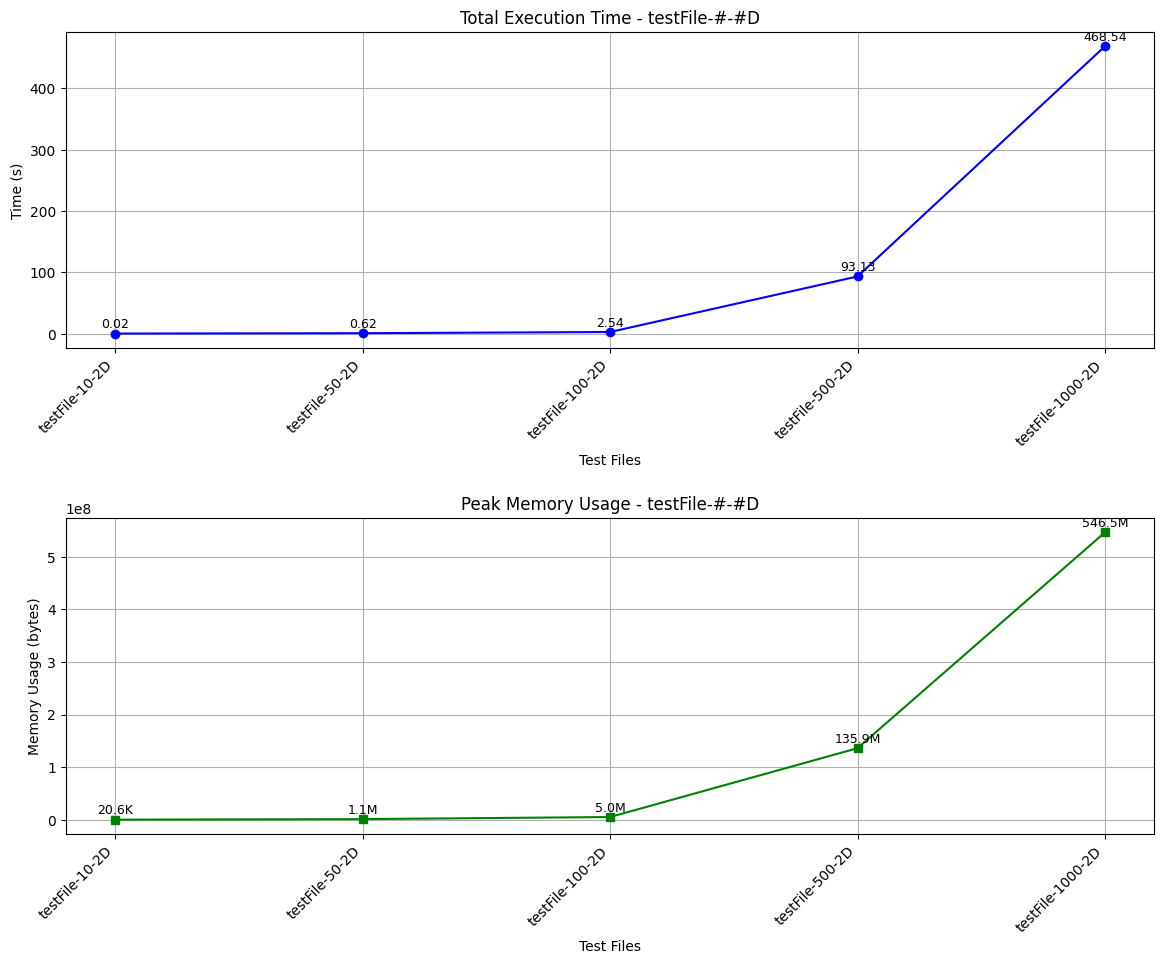

/var/folders/n1/qgmyk_w56dvcbfgpn3q2f7m00000gn/T/ipykernel_46625/197892507.py:37: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(pad=2.0)


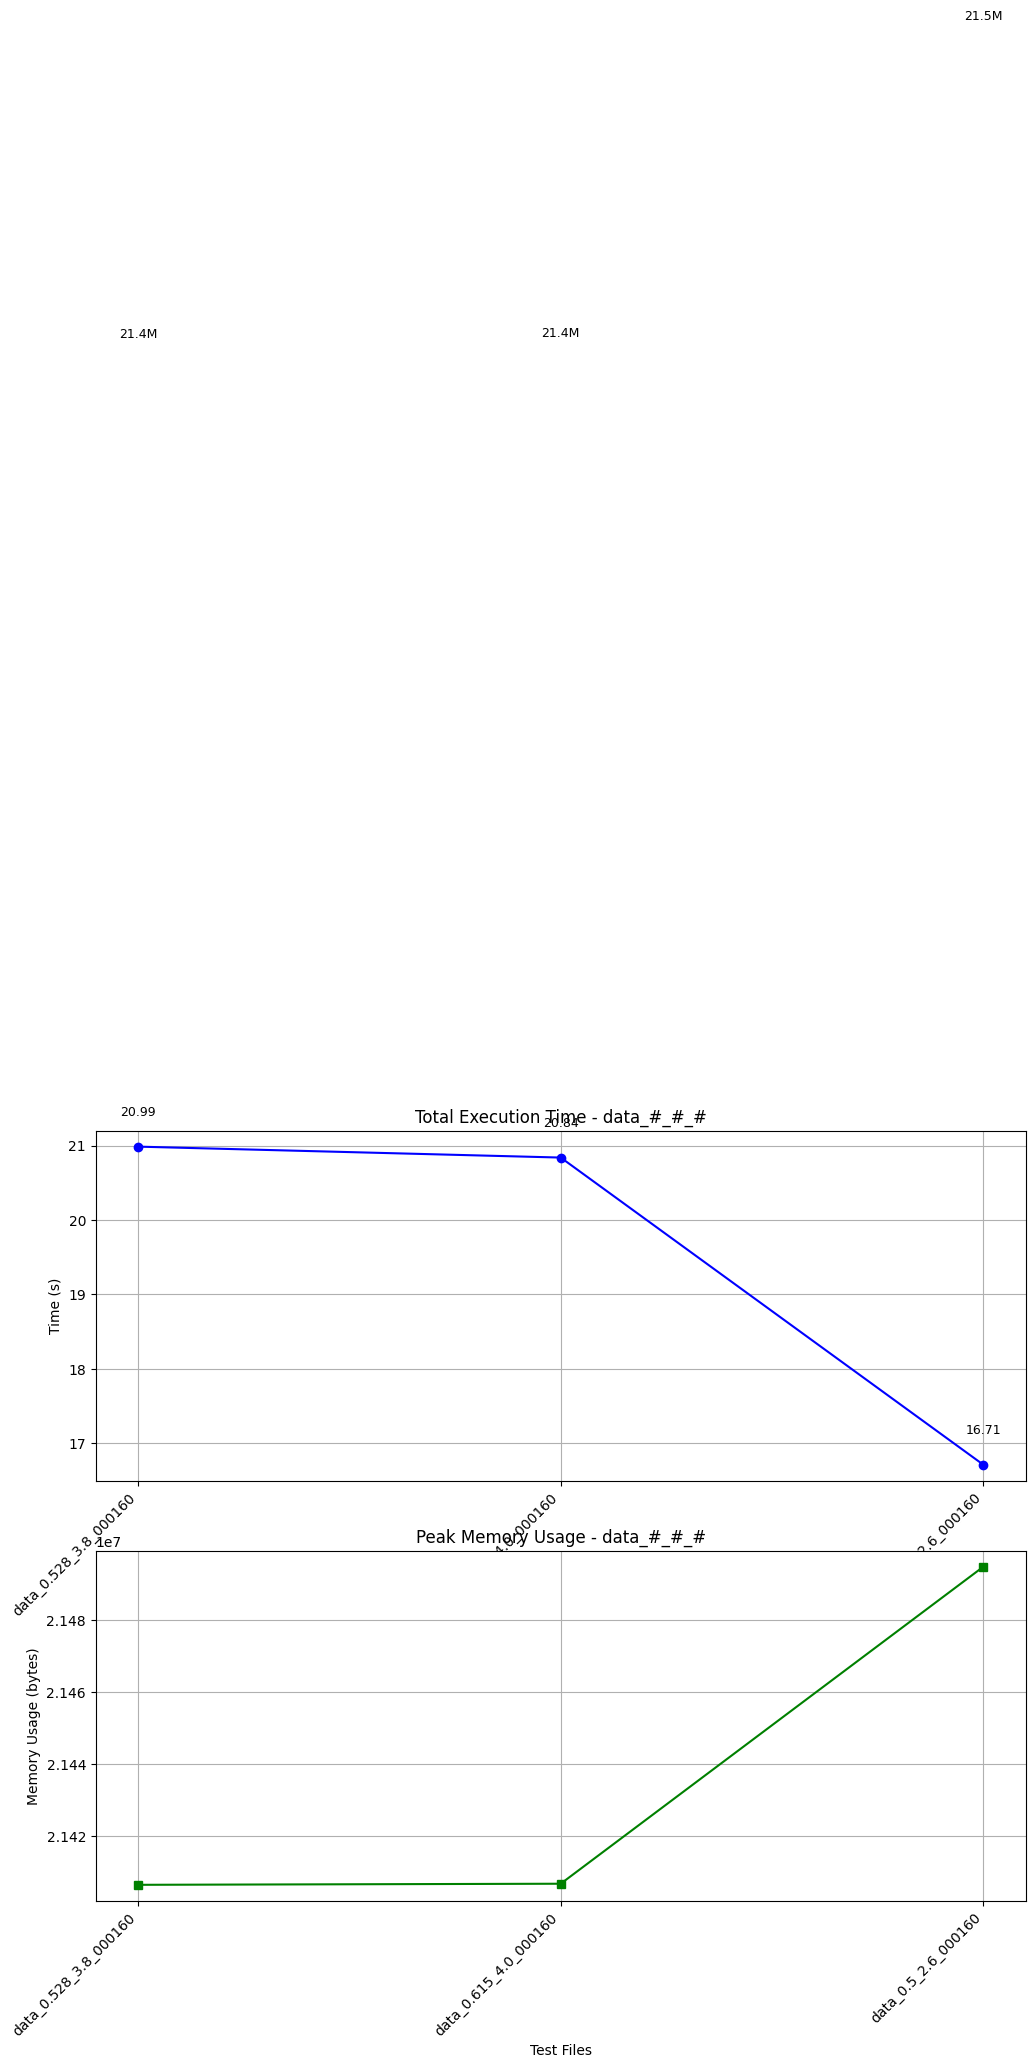

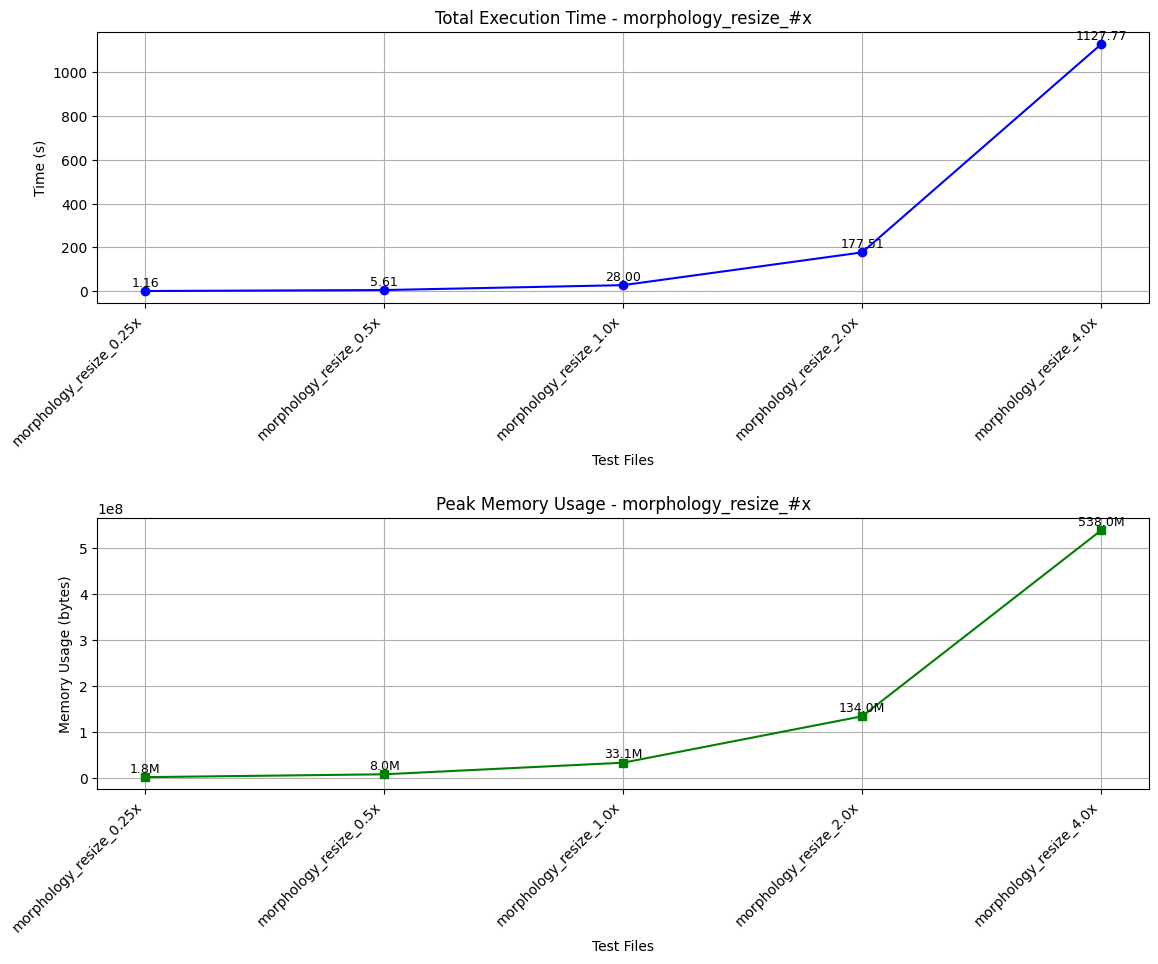

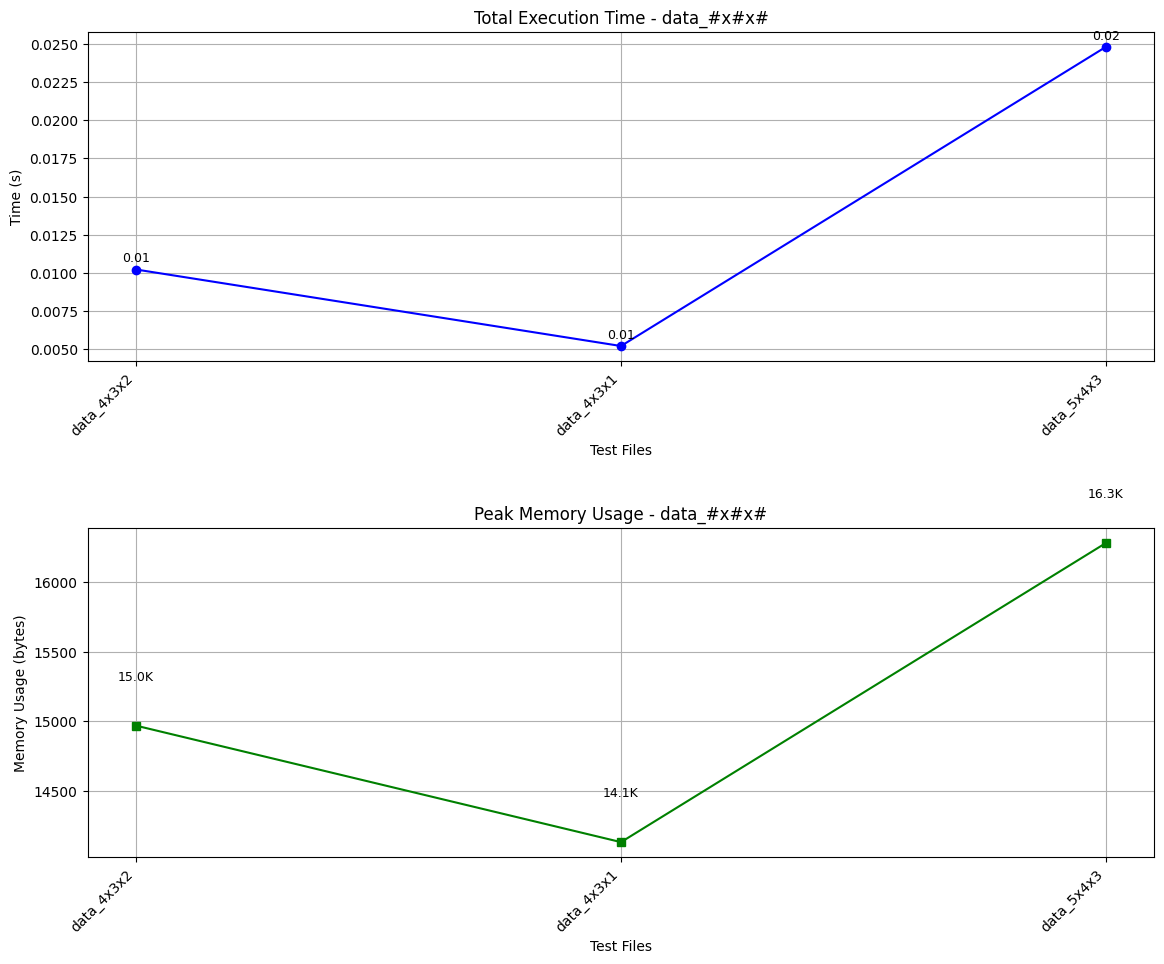

Pattern: testFile-#-#D, Total files: 5, Rows: 5, Cols: 2
Processing file testFile-10-2D at row 0
Processing file testFile-50-2D at row 1
Processing file testFile-100-2D at row 2
Processing file testFile-500-2D at row 3
Processing file testFile-1000-2D at row 4


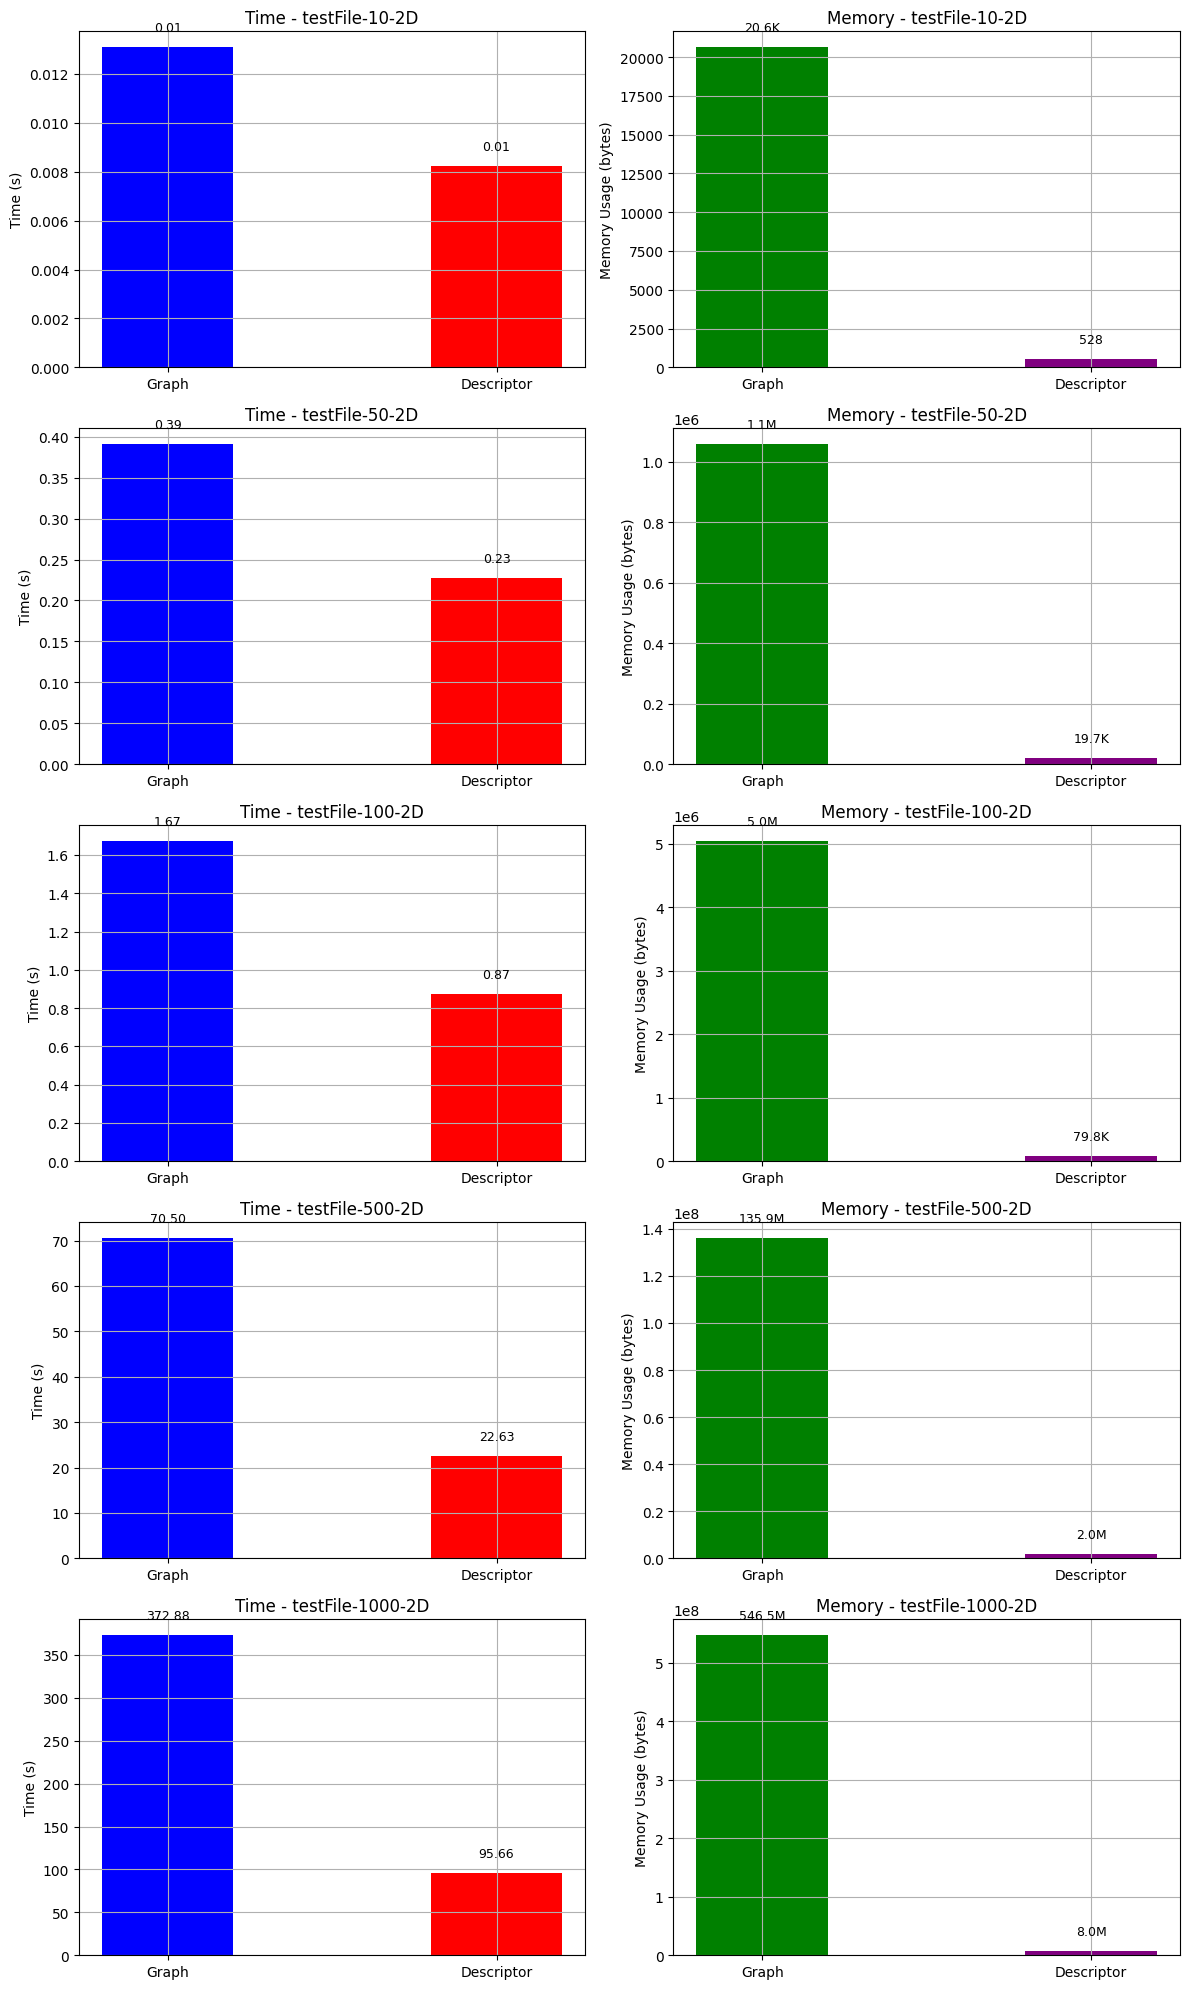

Pattern: data_#_#_#, Total files: 3, Rows: 3, Cols: 2
Processing file data_0.528_3.8_000160 at row 0
Processing file data_0.615_4.0_000160 at row 1
Processing file data_0.5_2.6_000160 at row 2


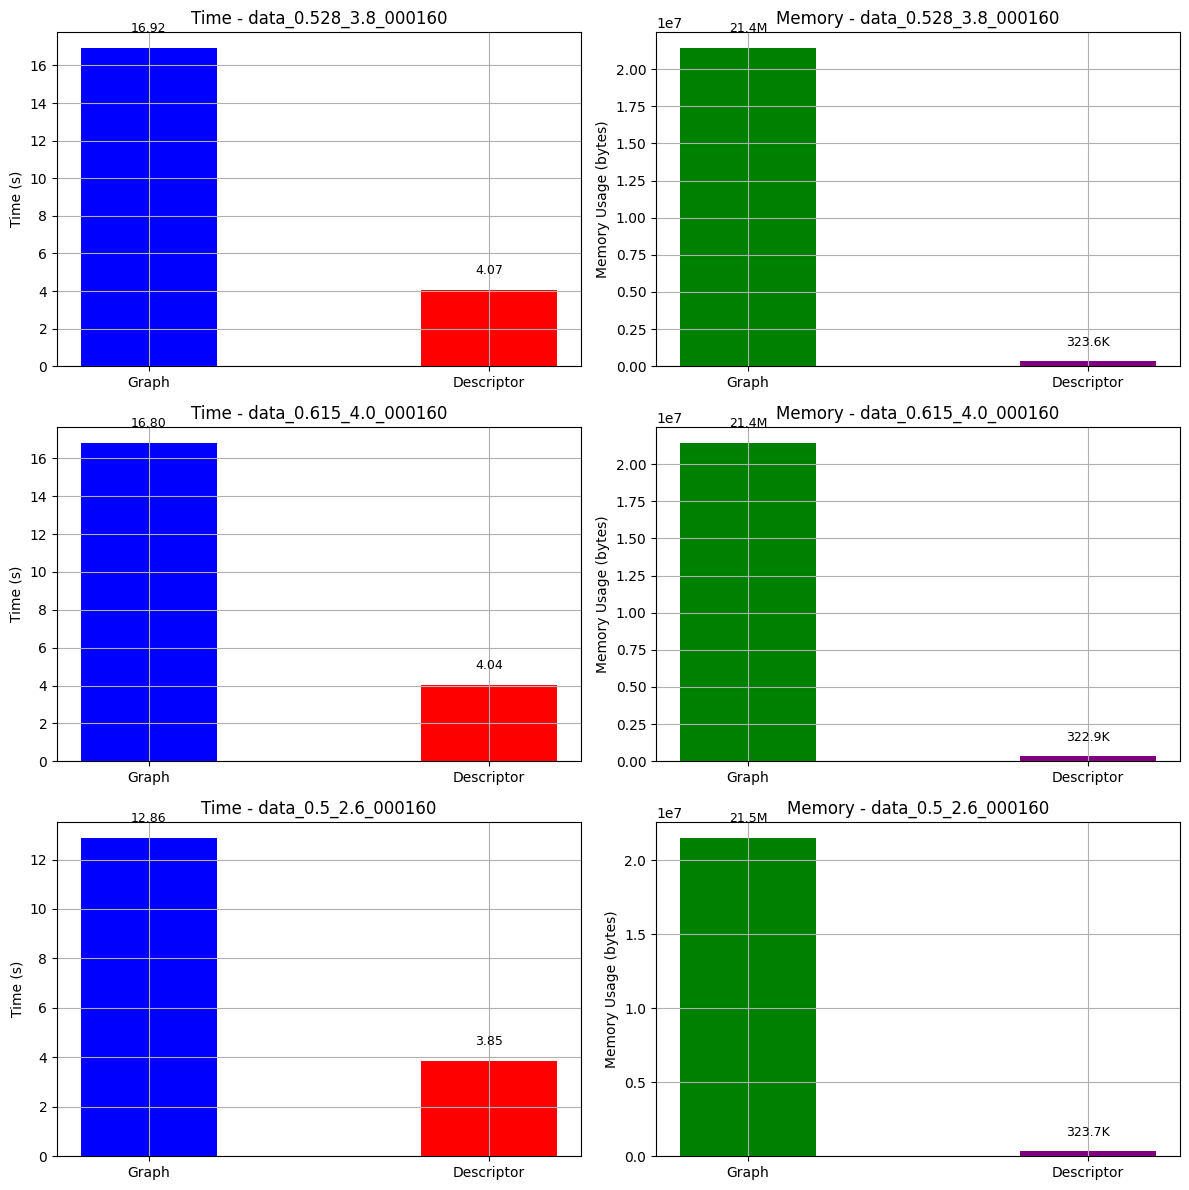

Pattern: morphology_resize_#x, Total files: 5, Rows: 5, Cols: 2
Processing file morphology_resize_0.25x at row 0
Processing file morphology_resize_0.5x at row 1
Processing file morphology_resize_1.0x at row 2
Processing file morphology_resize_2.0x at row 3
Processing file morphology_resize_4.0x at row 4


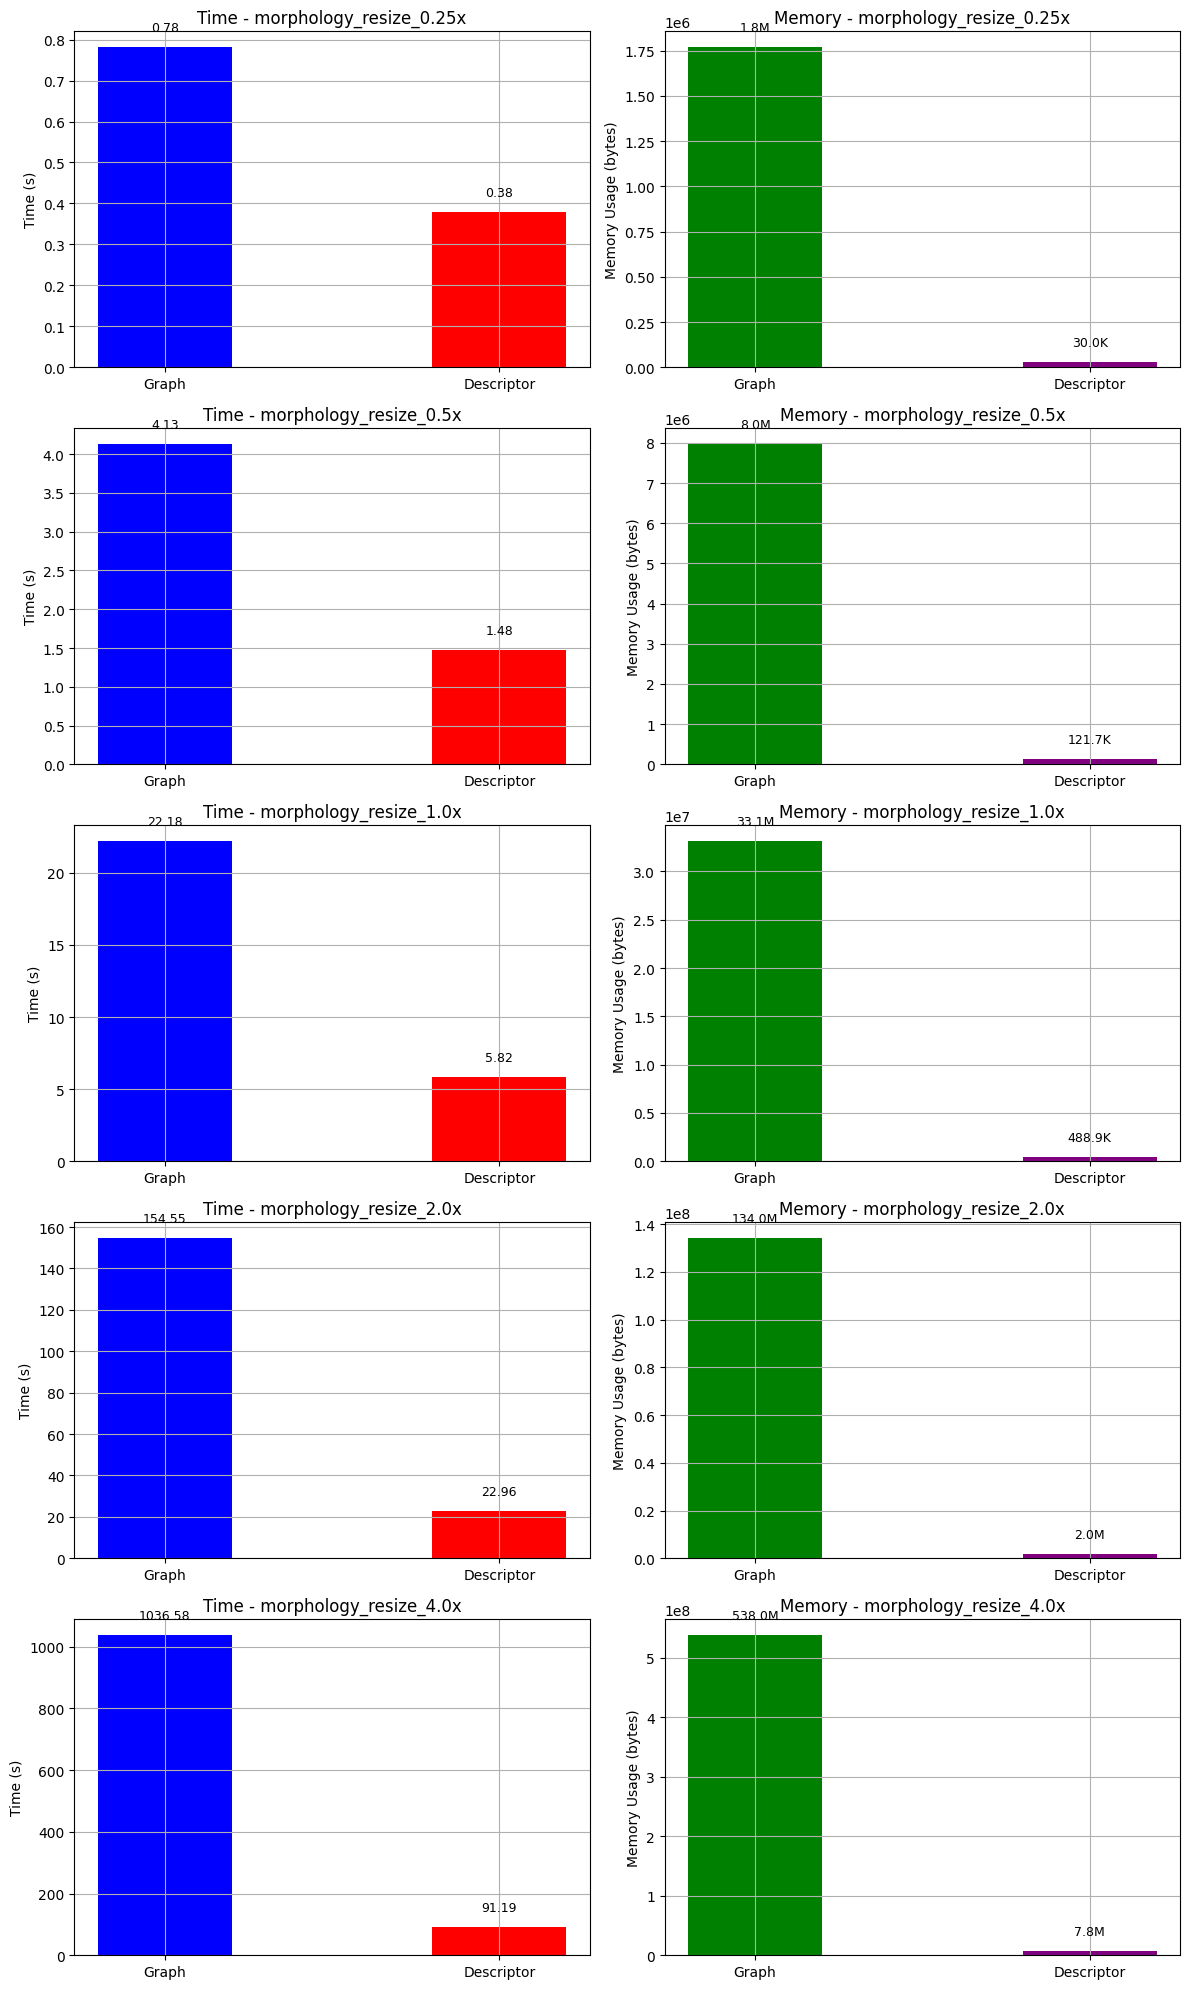

Pattern: data_#x#x#, Total files: 3, Rows: 3, Cols: 2
Processing file data_4x3x2 at row 0
Processing file data_4x3x1 at row 1
Processing file data_5x4x3 at row 2


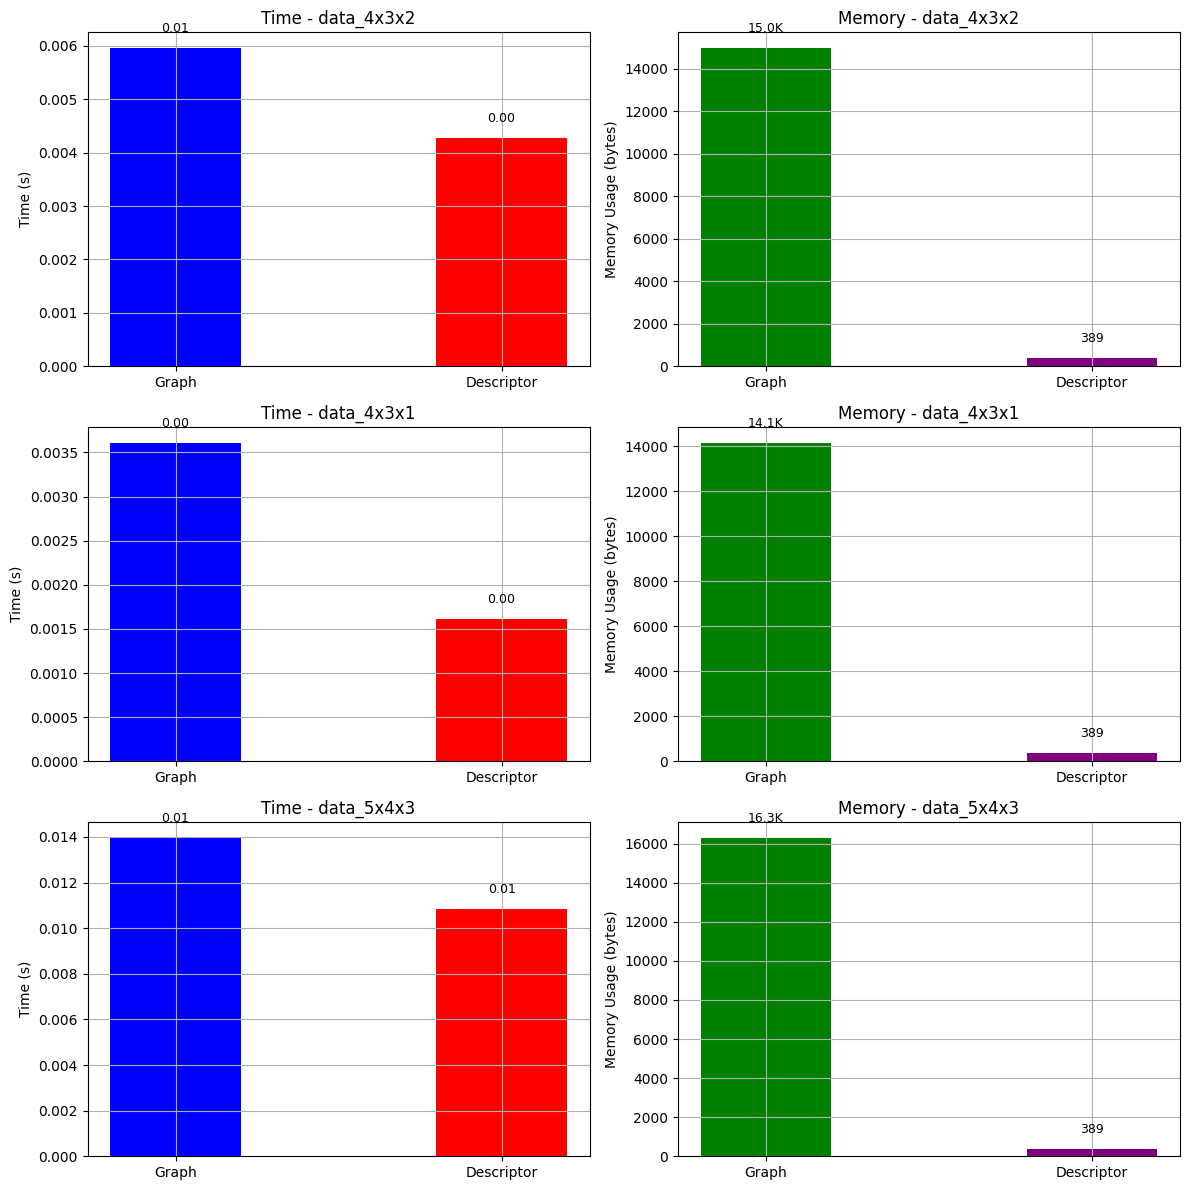

In [7]:
plot_total_execution_and_memory("stats.csv")
plot_stepwise_execution_and_memory("stats.csv")


## Testing Code
---
Doing test & generating CSV file 

### Testing :: igraph_testing_main.py (from main branch)

In [8]:
import hwi_igraph_testing_main as ig
import descriptors as ds
import os
import time
import matplotlib.pyplot as plt
import tracemalloc


current_dir = os.getcwd()
data_path = f"{current_dir}/graspi_igraph/data/"
descriptors_path = f"{current_dir}/graspi_igraph/p1descriptors/"
test_files = [os.path.splitext(file)[0] for file in os.listdir(data_path)]
epsilon=1e-5

times = []
mems = []
time_mem_stats = {}

for test_file in test_files:
    # g = ig.generateGraph(data_path + test_file + ".txt")
    import time
    tracemalloc.start()
    graph_start = time.time()
    g,is_2D, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths, shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca= ig.generateGraph(data_path + test_file + ".txt")
    _stats = tracemalloc.get_traced_memory()
    graph_end = time.time()
    tracemalloc.stop()
    graph_mem = _stats[1]-_stats[0]  
    stats = ds.desciptors(g)
    #ig.visual2D(g, 'graph')

    print(f"{test_file} Results")

    with open(descriptors_path + "p1descriptors." + test_file + ".log") as f:
        for line in f:
            stat = line.strip().split(" ")
            try:
                # if stats.get(stat[0], -1) == int(stat[1]):
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != int(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
            except ValueError:
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != float(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
    descriptor_time = stats["time"]
    descriptor_mem = stats["mem"]

    times.append(descriptor_time)
    mems.append(descriptor_mem)

    graph_time = graph_end-graph_start
    print(f"Total time to calculate graph: {graph_time} second(s)")
    print(f"Total time to calculate descriptors: {descriptor_time} second(s)")
    print(f"Peak memory usage for graph generation: {graph_mem} bytes")
    print(f"Peak memory usage for descriptor calculation: {descriptor_mem} bytes")
    print(stats)
    print("")
    time_mem_stats[test_file] = {"graph_time": graph_time, "descriptor_time": descriptor_time,  "graph_mem":graph_mem, "descriptor_mem": descriptor_mem}

save_dict_to_csv(time_mem_stats, "stats_new_green_method.csv")



testFile-100-2D Results
STAT_n passed
STAT_e passed
STAT_n_D passed
STAT_n_A passed
STAT_CC_D passed
STAT_CC_A passed
STAT_CC_D_An passed
STAT_CC_A_Ca passed
ABS_f_D passed
CT_f_conn_D_An passed
CT_f_conn_A_Ca passed
CT_n_D_adj_An failed - 0 is not the same as expected 1
CT_n_A_adj_Ca failed - 0 is not the same as expected 1
Total time to calculate graph: 5.825911998748779 second(s)
Total time to calculate descriptors: 0.8879051208496094 second(s)
Peak memory usage for graph generation: 11640827 bytes
Peak memory usage for descriptor calculation: 79776 bytes
{'STAT_n': 10000, 'STAT_e': 100, 'STAT_n_D': 5000, 'STAT_n_A': 5000, 'STAT_CC_D': 1, 'STAT_CC_A': 1, 'STAT_CC_D_An': 0, 'STAT_CC_A_Ca': 0, 'ABS_f_D': 0.5, 'CT_f_conn_D_An': 0.0, 'CT_f_conn_A_Ca': 0.0, 'CT_n_D_adj_An': 0, 'CT_n_A_adj_Ca': 0, 'time': 0.8879051208496094, 'mem': 79776}

data_0.528_3.8_000160 Results
STAT_n passed
STAT_e failed - 2653 is not the same as expected 3698
STAT_n_D passed
STAT_n_A passed
STAT_CC_D passed
STAT

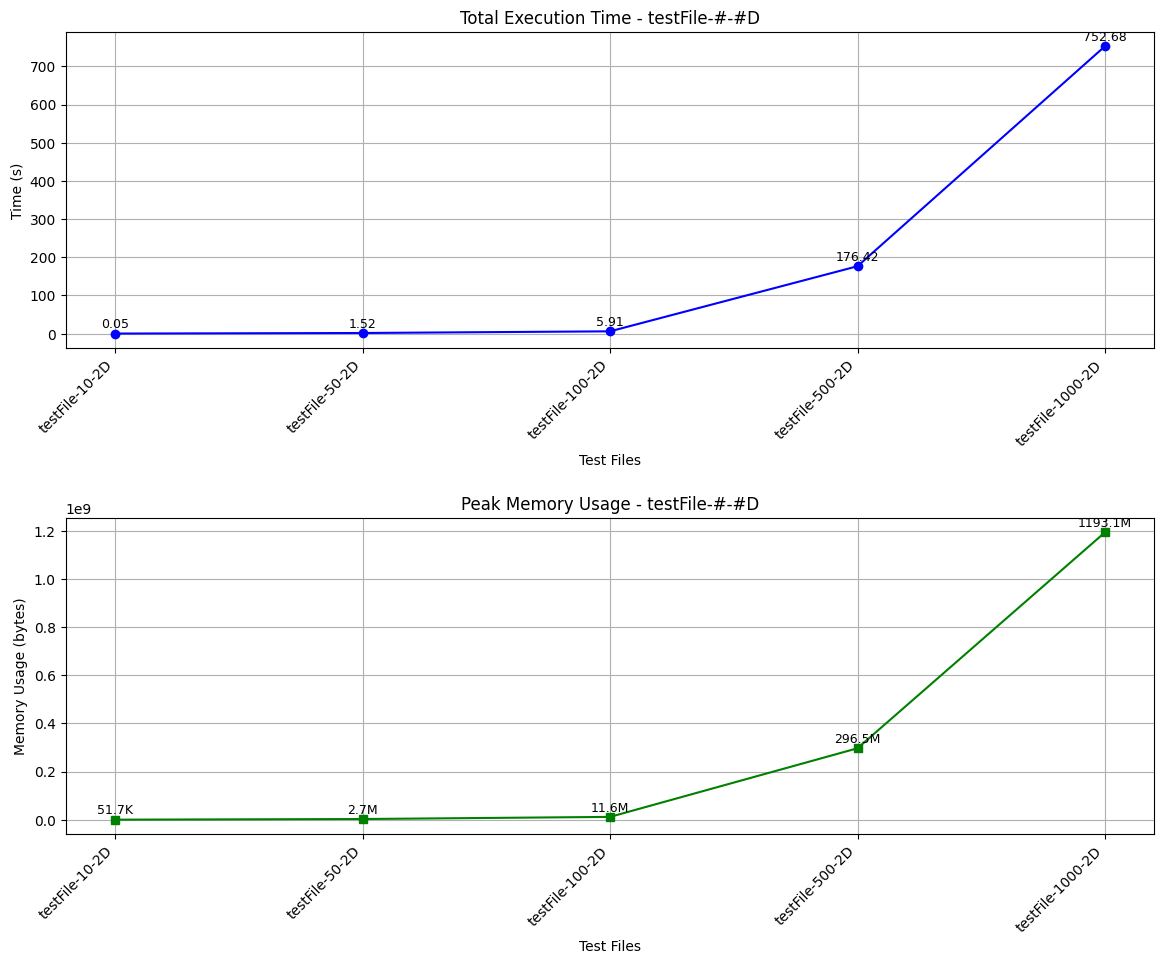

/var/folders/n1/qgmyk_w56dvcbfgpn3q2f7m00000gn/T/ipykernel_91527/197892507.py:37: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(pad=2.0)


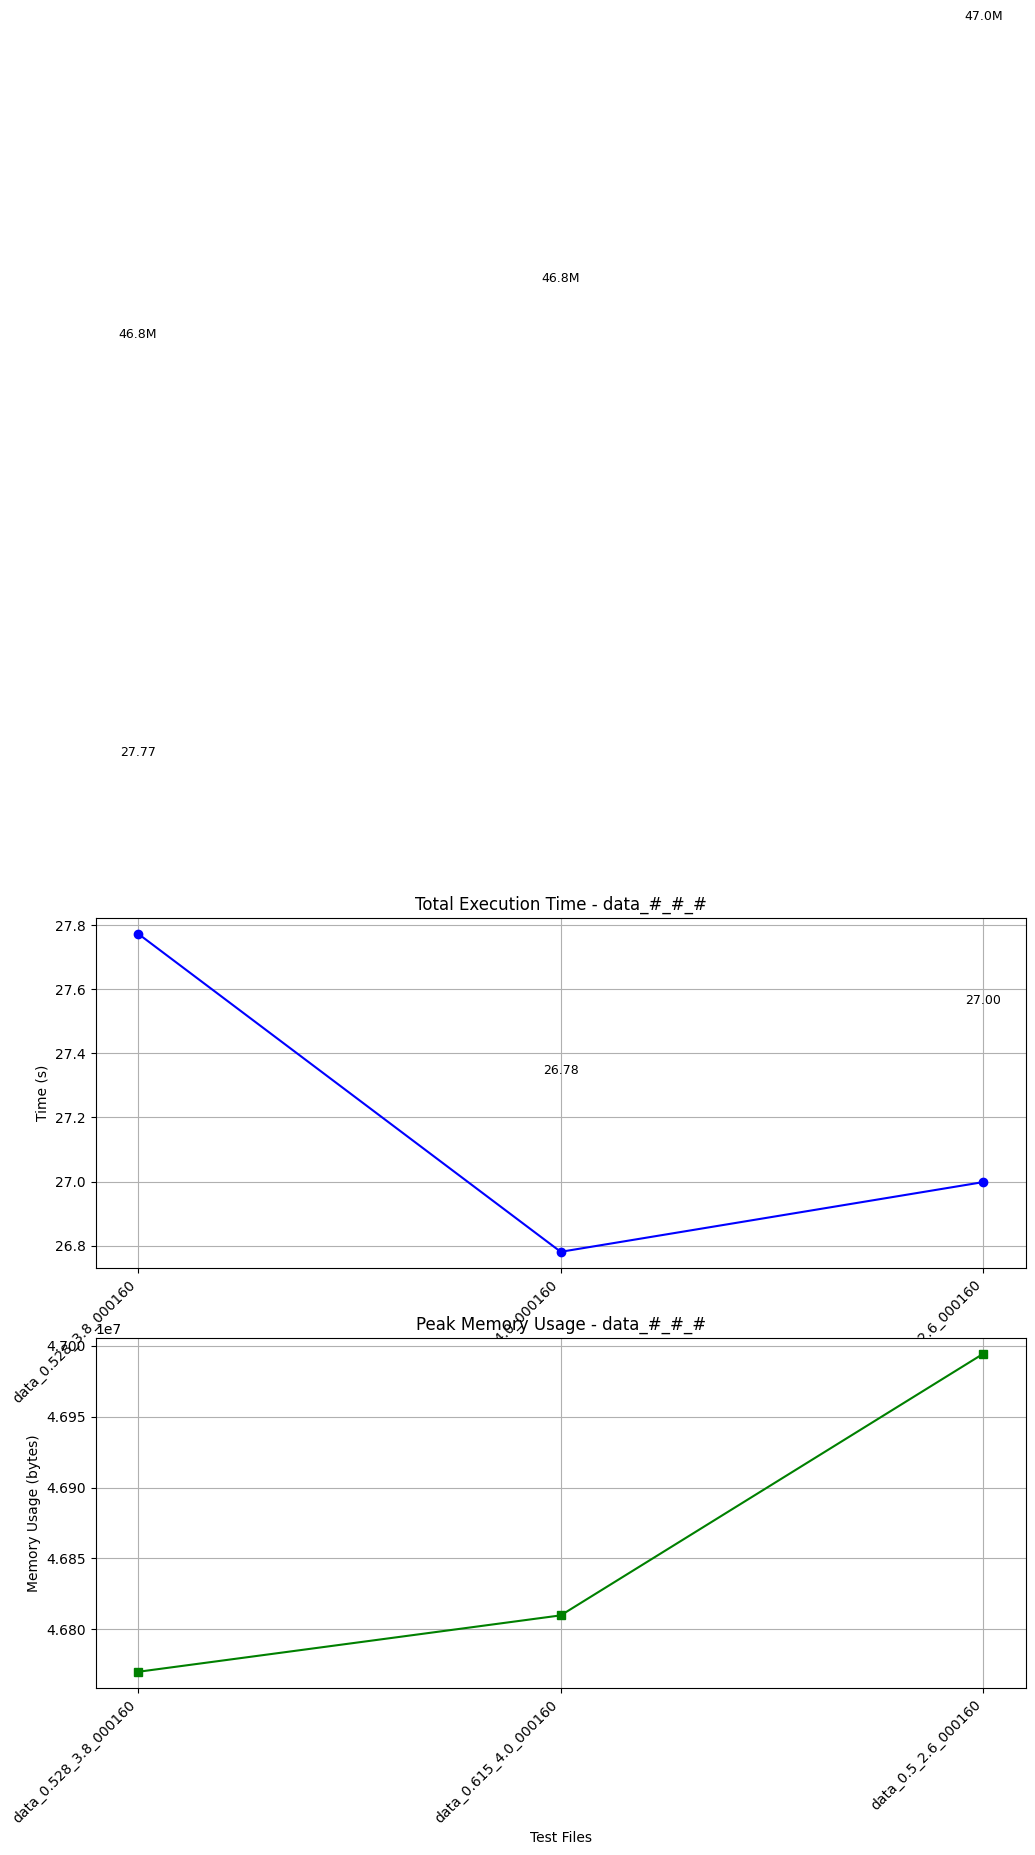

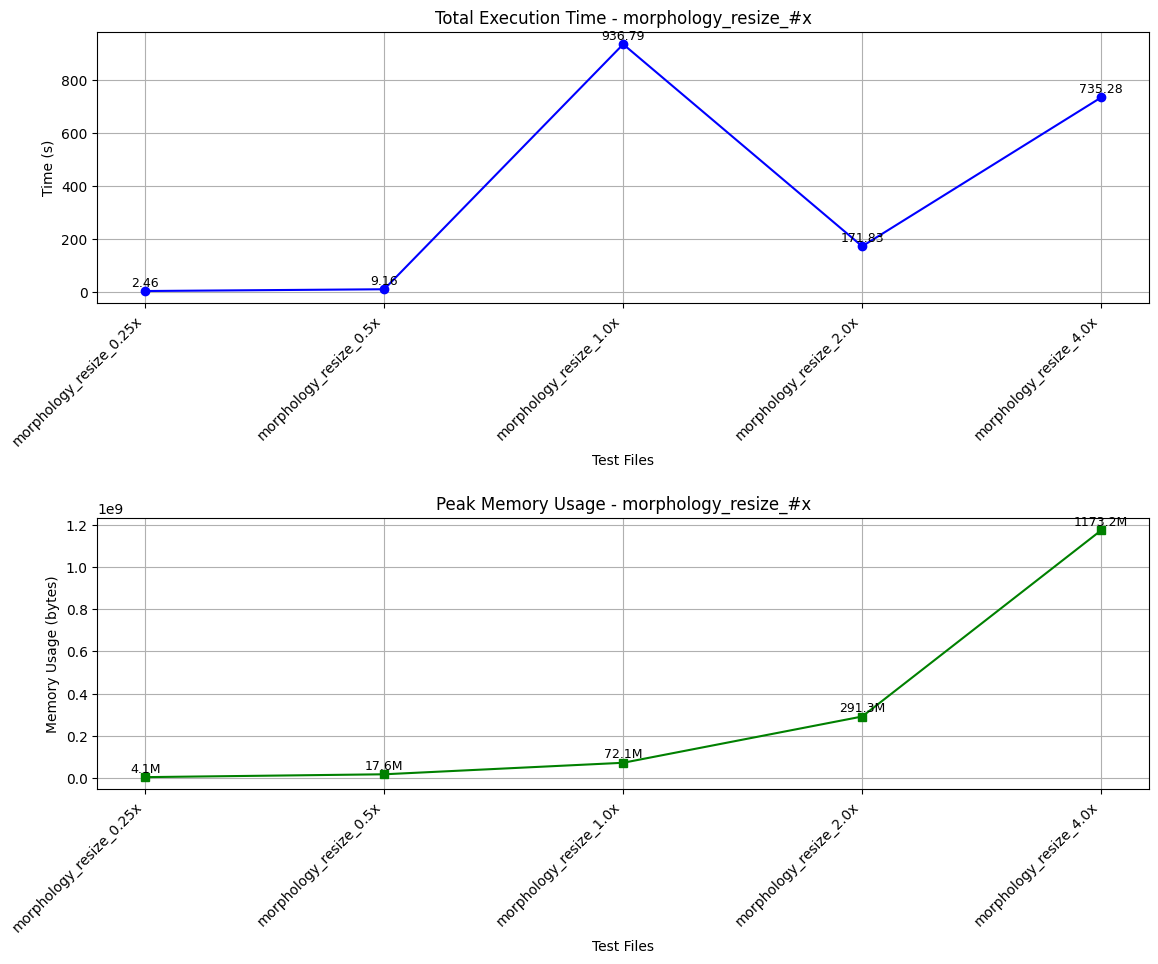

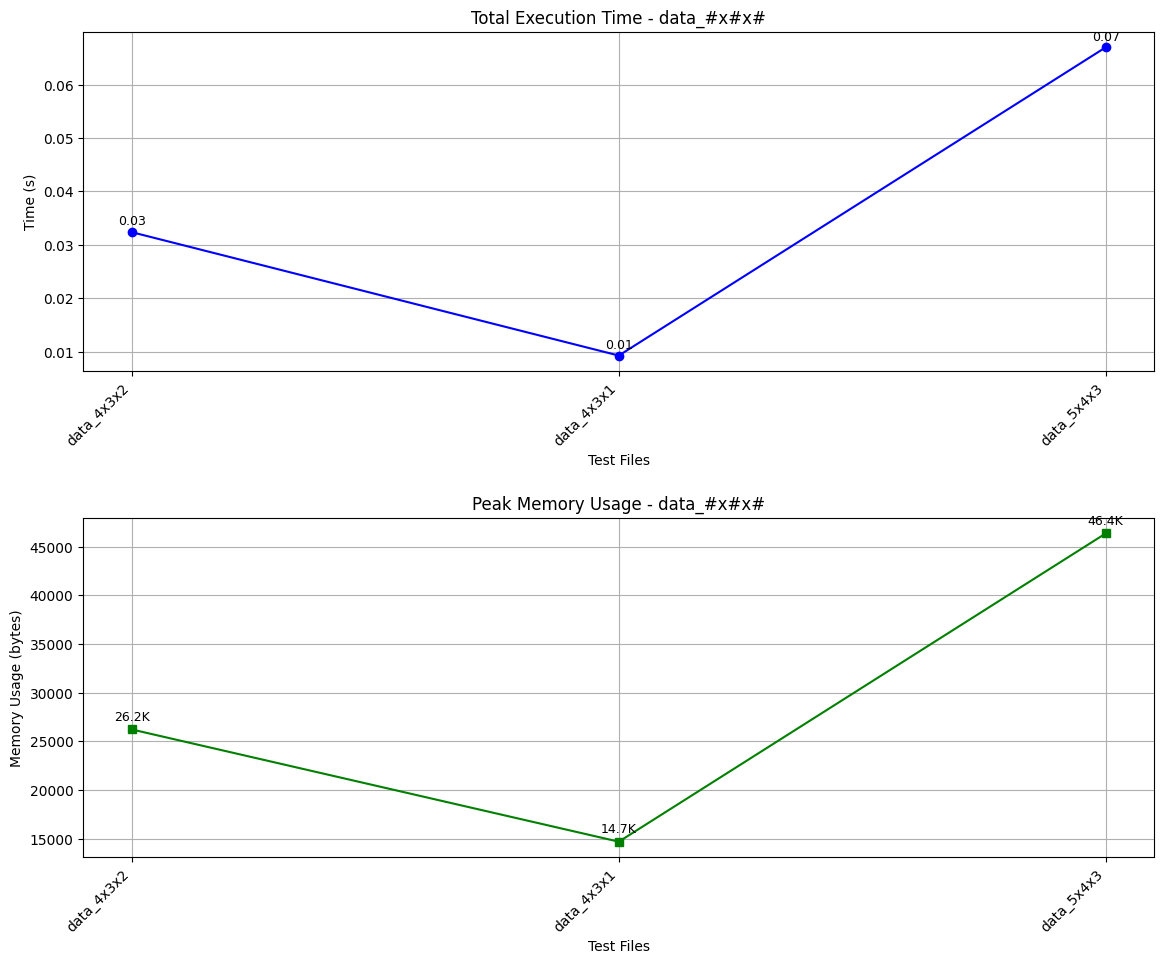

Pattern: testFile-#-#D, Total files: 5, Rows: 5, Cols: 2
Processing file testFile-10-2D at row 0
Processing file testFile-50-2D at row 1
Processing file testFile-100-2D at row 2
Processing file testFile-500-2D at row 3
Processing file testFile-1000-2D at row 4


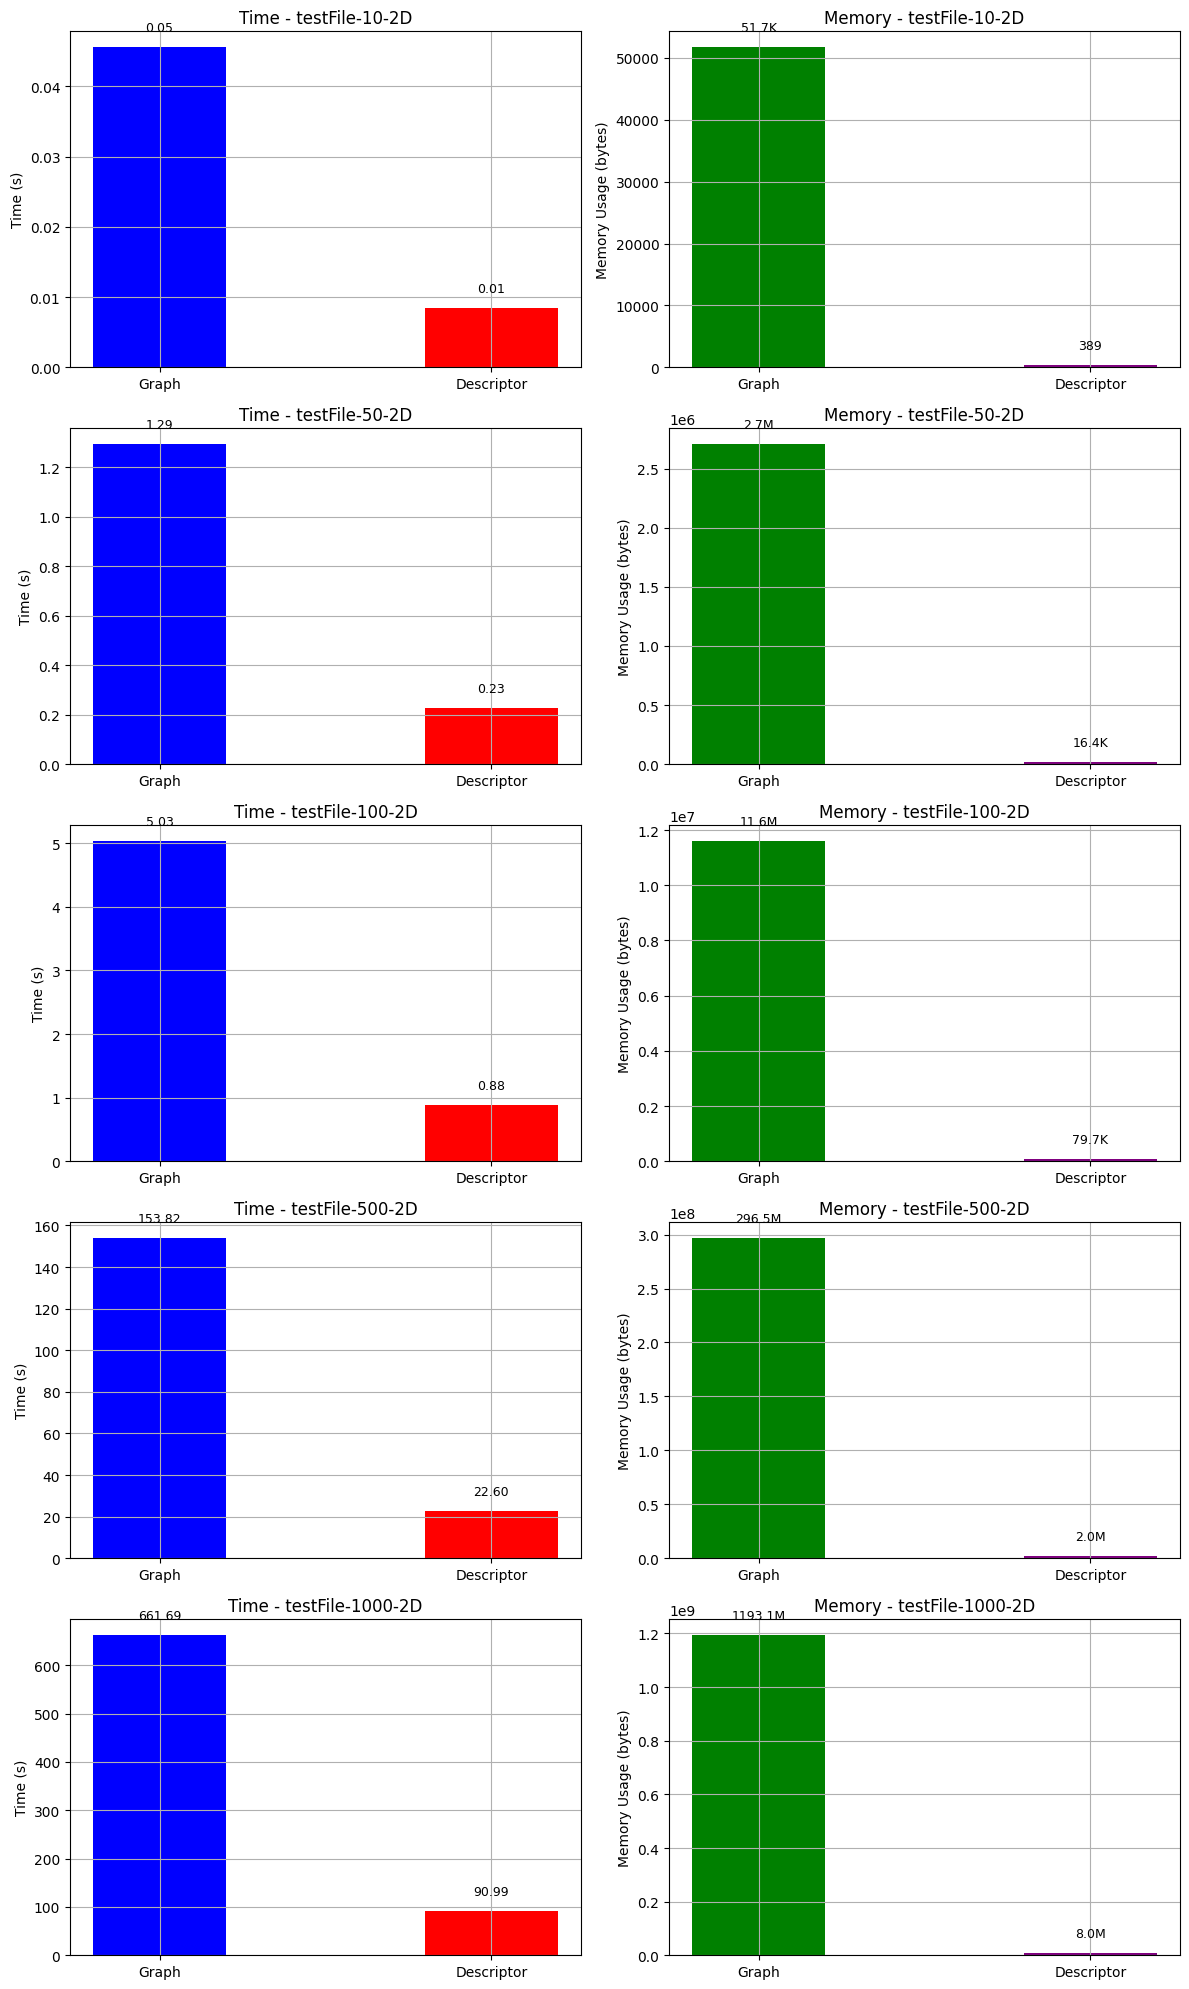

Pattern: data_#_#_#, Total files: 3, Rows: 3, Cols: 2
Processing file data_0.528_3.8_000160 at row 0
Processing file data_0.615_4.0_000160 at row 1
Processing file data_0.5_2.6_000160 at row 2


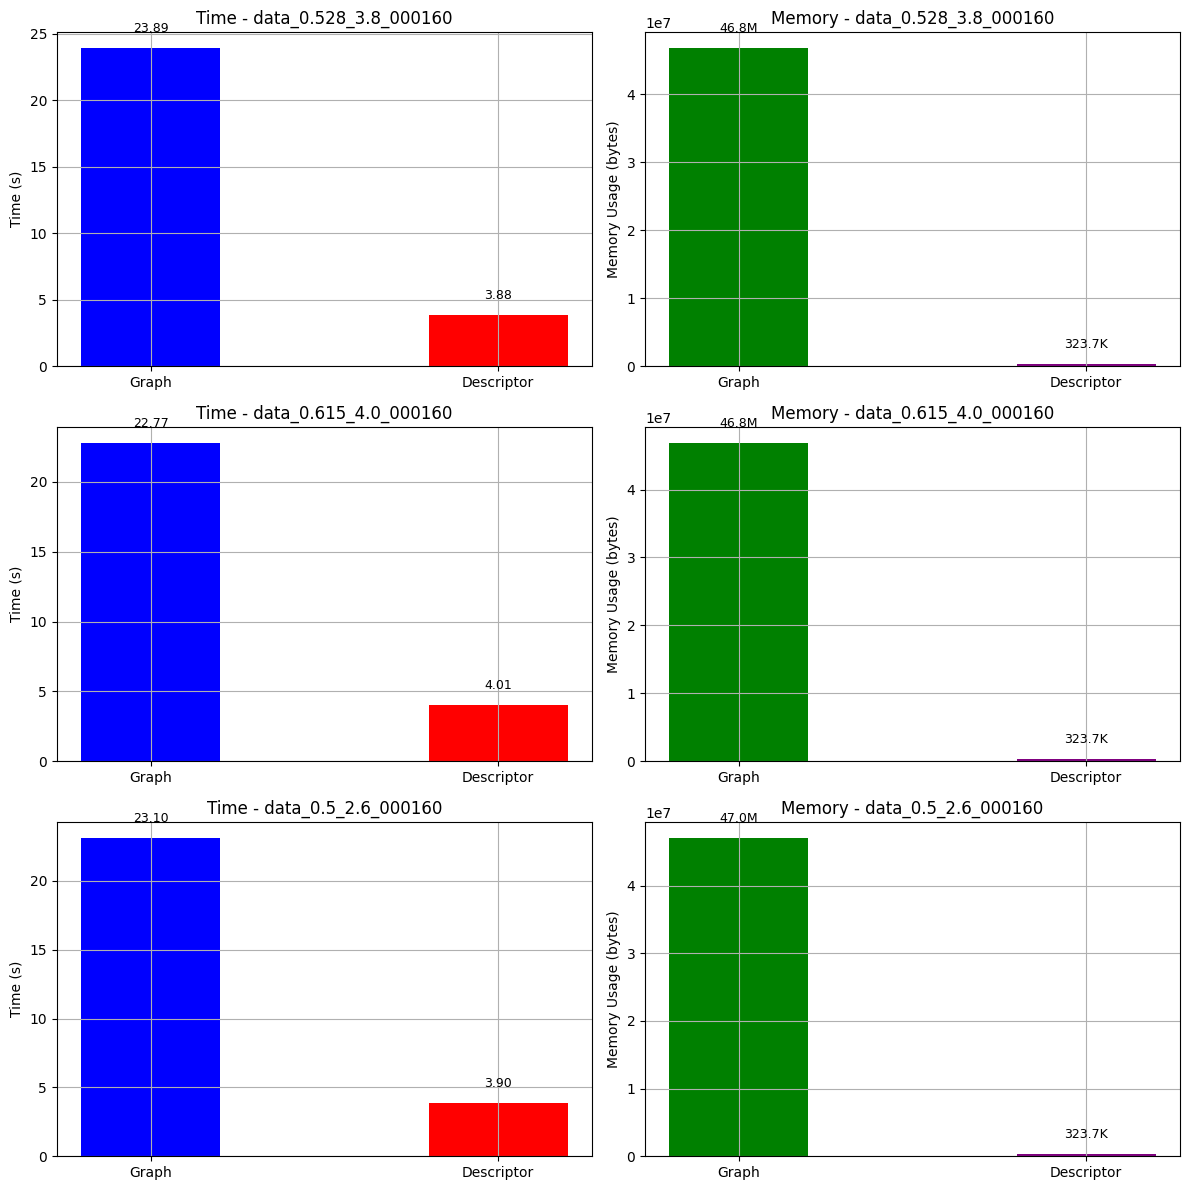

Pattern: morphology_resize_#x, Total files: 5, Rows: 5, Cols: 2
Processing file morphology_resize_0.25x at row 0
Processing file morphology_resize_0.5x at row 1
Processing file morphology_resize_1.0x at row 2
Processing file morphology_resize_2.0x at row 3
Processing file morphology_resize_4.0x at row 4


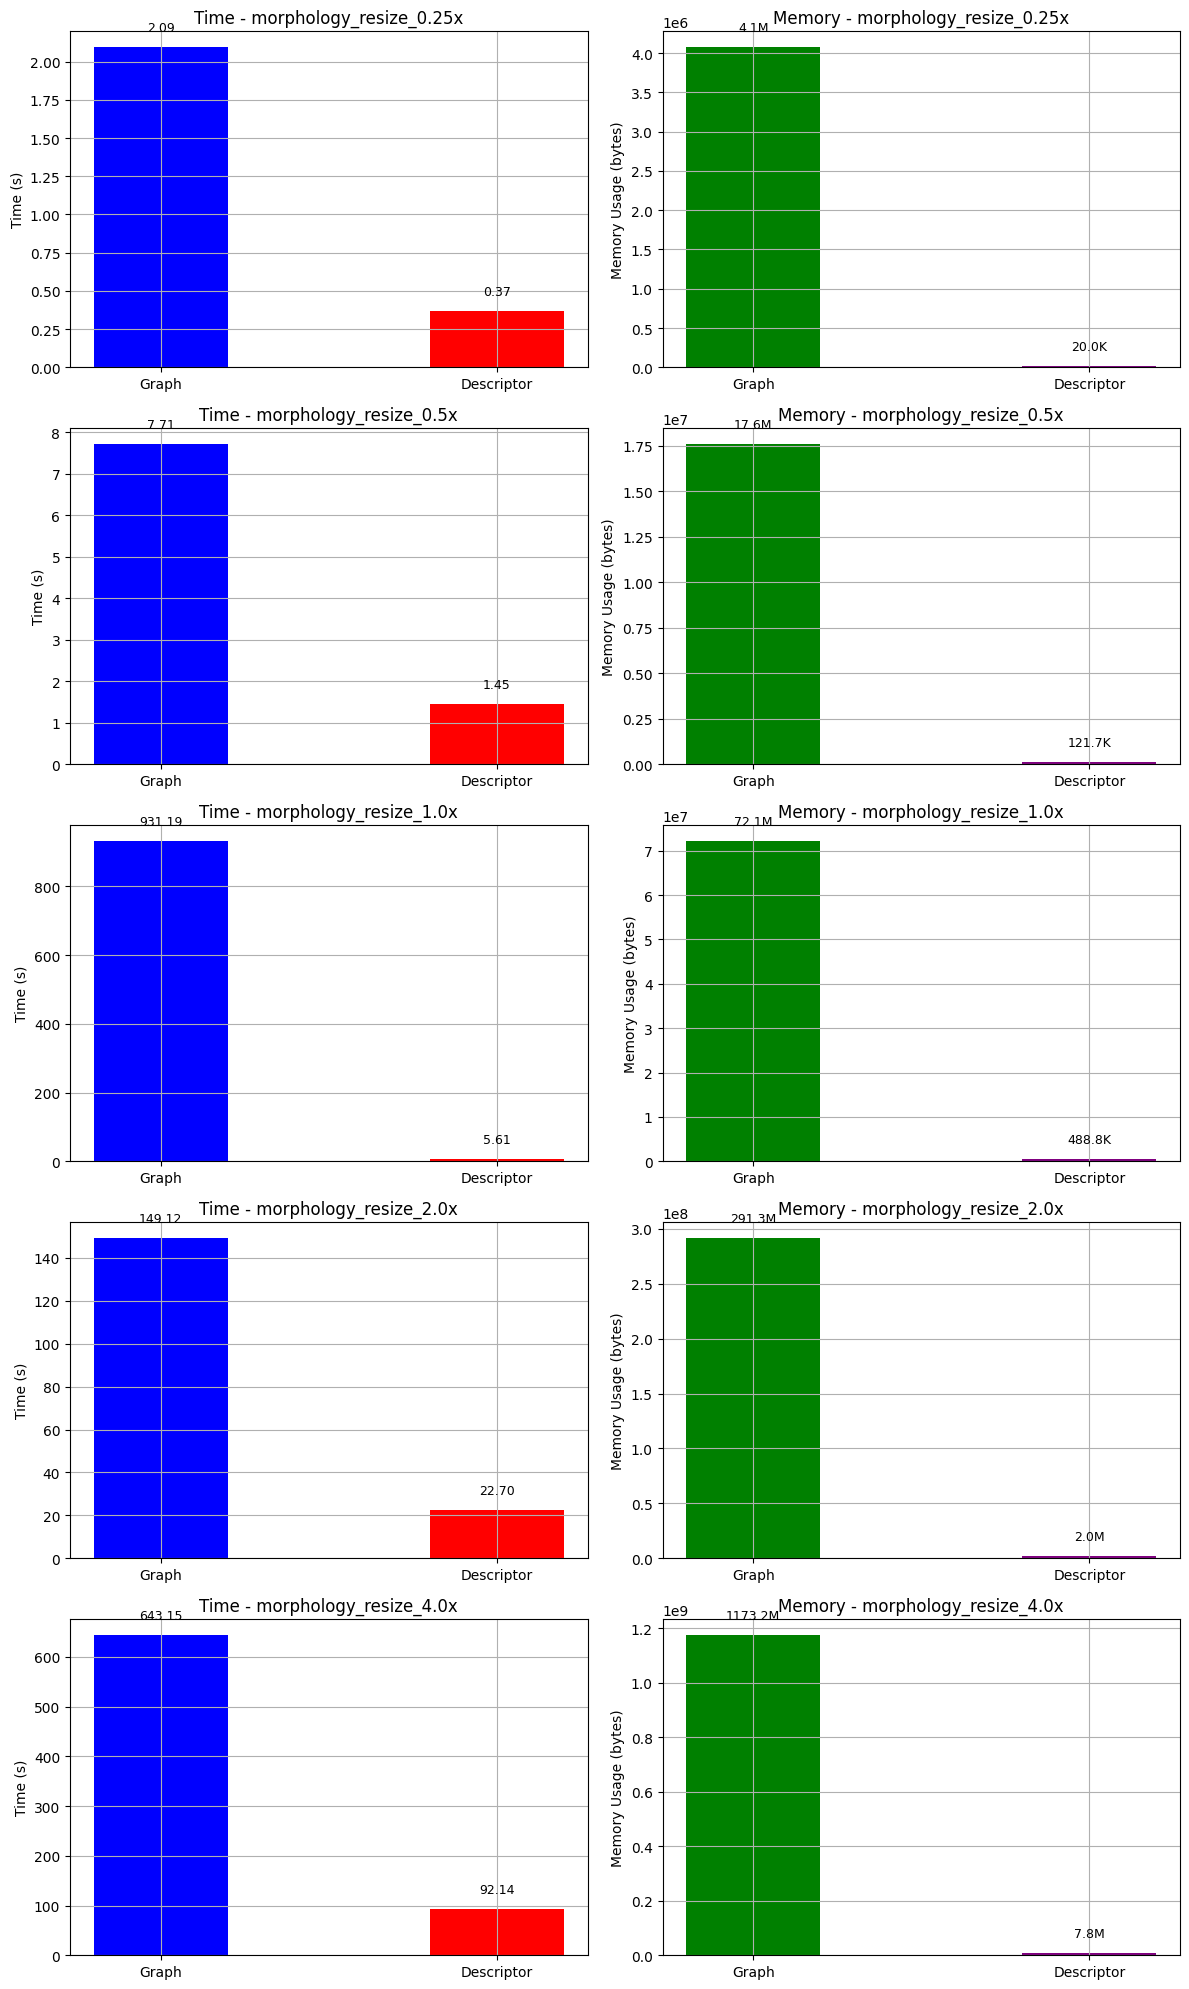

Pattern: data_#x#x#, Total files: 3, Rows: 3, Cols: 2
Processing file data_4x3x2 at row 0
Processing file data_4x3x1 at row 1
Processing file data_5x4x3 at row 2


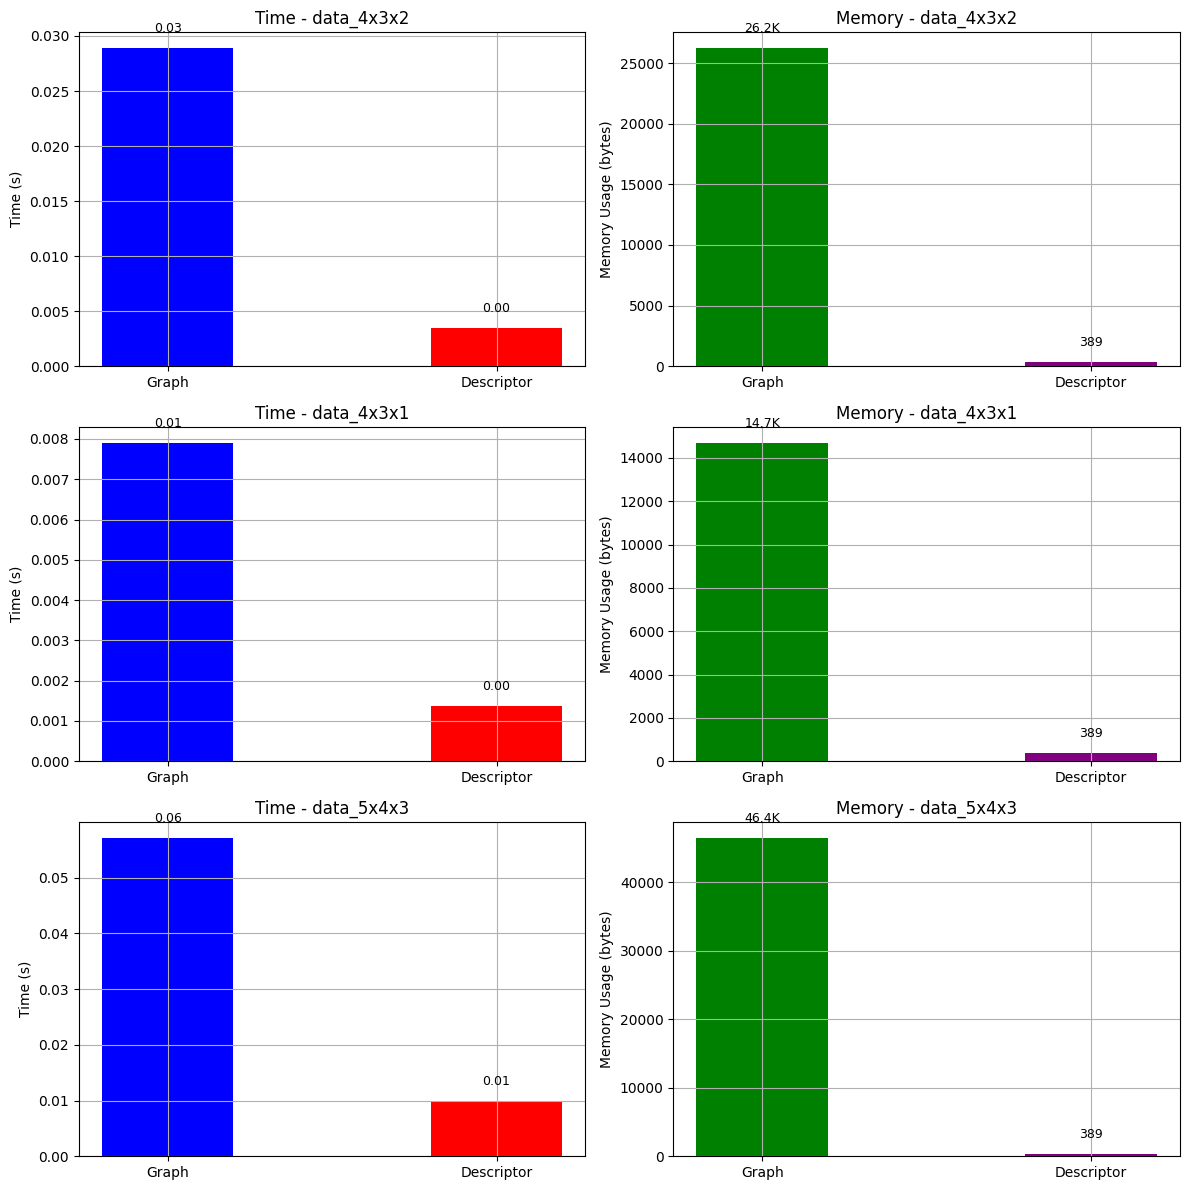

In [12]:
plot_total_execution_and_memory("stats_main_igraph.csv")
plot_stepwise_execution_and_memory("stats_main_igraph.csv")

In [9]:
import hwi_igraph_testing_main as ig
import descriptors as ds
import os
import time
import matplotlib.pyplot as plt
import tracemalloc


current_dir = os.getcwd()
data_path = f"{current_dir}/graspi_igraph/data/"
descriptors_path = f"{current_dir}/graspi_igraph/p1descriptors/"
test_files = [os.path.splitext(file)[0] for file in os.listdir(data_path)]
epsilon=1e-5

times = []
mems = []
time_mem_stats = {}

for test_file in test_files:
    # g = ig.generateGraph(data_path + test_file + ".txt")
    import time
    tracemalloc.start()
    graph_start = time.time()
    g,is_2D, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths, shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca= ig.generateGraph(data_path + test_file + ".txt")
    _stats = tracemalloc.get_traced_memory()
    graph_end = time.time()
    tracemalloc.stop()
    graph_mem = _stats[1]-_stats[0]  
    stats = ds.desciptors(g)
    #ig.visual2D(g, 'graph')

    print(f"{test_file} Results")

    with open(descriptors_path + "p1descriptors." + test_file + ".log") as f:
        for line in f:
            stat = line.strip().split(" ")
            try:
                # if stats.get(stat[0], -1) == int(stat[1]):
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != int(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
            except ValueError:
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != float(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
    descriptor_time = stats["time"]
    descriptor_mem = stats["mem"]

    times.append(descriptor_time)
    mems.append(descriptor_mem)

    graph_time = graph_end-graph_start
    print(f"Total time to calculate graph: {graph_time} second(s)")
    print(f"Total time to calculate descriptors: {descriptor_time} second(s)")
    print(f"Peak memory usage for graph generation: {graph_mem} bytes")
    print(f"Peak memory usage for descriptor calculation: {descriptor_mem} bytes")
    print(stats)
    print("")
    time_mem_stats[test_file] = {"graph_time": graph_time, "descriptor_time": descriptor_time,  "graph_mem":graph_mem, "descriptor_mem": descriptor_mem}

save_dict_to_csv(time_mem_stats, "stats_main_modified_igraph.csv")



첫 번째 줄 내용: ['100', '100', '1']
loadtxt time :  0.001444101333618164
100
100
1
[0. 0. 0. ... 1. 1. 1.]
PART #1 time :  0.3845798969268799
filter time (in PART #2): 1.839223861694336
PART #2 time :  1.953028917312622
PART #3 time :  2.7897469997406006
testFile-100-2D Results
STAT_n passed
STAT_e passed
STAT_n_D passed
STAT_n_A passed
STAT_CC_D passed
STAT_CC_A passed
STAT_CC_D_An passed
STAT_CC_A_Ca passed
ABS_f_D passed
CT_f_conn_D_An passed
CT_f_conn_A_Ca passed
CT_n_D_adj_An failed - 0 is not the same as expected 1
CT_n_A_adj_Ca failed - 0 is not the same as expected 1
Total time to calculate graph: 5.248316049575806 second(s)
Total time to calculate descriptors: 0.8971757888793945 second(s)
Peak memory usage for graph generation: 11586030 bytes
Peak memory usage for descriptor calculation: 79662 bytes
{'STAT_n': 10000, 'STAT_e': 100, 'STAT_n_D': 5000, 'STAT_n_A': 5000, 'STAT_CC_D': 1, 'STAT_CC_A': 1, 'STAT_CC_D_An': 0, 'STAT_CC_A_Ca': 0, 'ABS_f_D': 0.5, 'CT_f_conn_D_An': 0.0, 'CT_f_c

In [63]:
import withoutP_igraph_testing as ig
import descriptors as ds
import os
import matplotlib.pyplot as plt

current_dir = os.getcwd()
data_path = f"{current_dir}/graspi_igraph/data/"
descriptors_path = f"{current_dir}/graspi_igraph/descriptors/"
test_files = [os.path.splitext(file)[0] for file in os.listdir(data_path)]
epsilon=1e-5

times = []
mems = []

for test_file in test_files:
    # g = ig.generateGraph(data_path + test_file + ".txt")
    import time
    graph_start = time.time()
    g, is_2d= ig.generateGraphAdj(data_path + test_file + ".txt")
    graph_end = time.time()
    stats = ds.desciptors(g)
    #ig.visual2D(g, 'graph')

    print(f"{test_file} Results")

    with open(descriptors_path + "descriptors." + test_file + ".log") as f:
        for line in f:
            stat = line.strip().split(" ")
            try:
                # if stats.get(stat[0], -1) == int(stat[1]):
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != int(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
            except ValueError:
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != float(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
    desc_time = stats["time"]   #time is predefined keyword
    mem = stats["mem"]

    times.append(desc_time)
    mems.append(mem)

    graph_time = graph_end-graph_start
    print(f"Total time to calculate graph: {graph_time} second(s)")
    print(f"Total time to calculate descriptors: {desc_time}second(s)")
    print(f"Peak memory usage for descriptor calculation: {mem}bytes")
    print(stats)
    print("")


testFile-100-2D Results
STAT_n passed
STAT_e passed
STAT_n_D passed
STAT_n_A passed
STAT_CC_D passed
STAT_CC_A passed
STAT_CC_D_An passed
STAT_CC_A_Ca passed
ABS_f_D passed
CT_f_conn_D_An passed
CT_f_conn_A_Ca passed
CT_n_D_adj_An failed - 0 is not the same as expected 1
CT_n_A_adj_Ca failed - 0 is not the same as expected 1
Total time to calculate graph: 0.1634969711303711 second(s)
Total time to calculate descriptors: 0.8956038951873779second(s)
Peak memory usage for descriptor calculation: 78579bytes
{'STAT_n': 10000, 'STAT_e': 100, 'STAT_n_D': 5000, 'STAT_n_A': 5000, 'STAT_CC_D': 1, 'STAT_CC_A': 1, 'STAT_CC_D_An': 0, 'STAT_CC_A_Ca': 0, 'ABS_f_D': 0.5, 'CT_f_conn_D_An': 0.0, 'CT_f_conn_A_Ca': 0.0, 'CT_n_D_adj_An': 0, 'CT_n_A_adj_Ca': 0, 'time': 0.8956038951873779, 'mem': 78579}

data_0.528_3.8_000160 Results
STAT_n passed
STAT_e passed
STAT_n_D passed
STAT_n_A passed
STAT_CC_D passed
STAT_CC_A passed
STAT_CC_D_An passed
STAT_CC_A_Ca passed
ABS_f_D passed
CT_f_conn_D_An passed
CT_f_c

KeyboardInterrupt: 

In [57]:
import combined_with as ig
import new_descriptors as ds
import os
import time
import matplotlib.pyplot as plt


current_dir = os.getcwd()
data_path = f"{current_dir}/graspi_igraph/data/"
descriptors_path = f"{current_dir}/graspi_igraph/p1descriptors/"
test_files = [os.path.splitext(file)[0] for file in os.listdir(data_path)]
epsilon=1e-4

times = []
mems = []
testfiles_2d = []
for test_file in test_files:
    # if 'morph' not in test_file:
    #     continue

    # if '1x' not in test_file:
    #     continue

    if '2D' not in test_file:
        continue
    # g = ig.generateGraph(data_path + test_file + ".txt")
    testfiles_2d.append(test_file)
    import time
    graph_start = time.time()
    g,is_2D, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths, shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca= ig.generateGraph(data_path + test_file + ".txt")
    graph_end = time.time()
    stats = ds.descriptors(g, test_file, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths, shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca)
    #ig.visual2D(g, 'graph')

    print(f"{test_file} Results")

    with open(descriptors_path + "p1descriptors." + test_file + ".log") as f:
        for line in f:
            stat = line.strip().split(" ")
            try:
                # if stats.get(stat[0], -1) == int(stat[1]):
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != int(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
            except ValueError:
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != float(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
    time = stats["time"]
    mem = stats["mem"]

    times.append(time)
    mems.append(mem)

    graph_time = graph_end-graph_start
    print(f"Total time to calculate graph: {graph_time} second(s)")
    print(f"Total time to calculate descriptors: {time} second(s)")
    print(f"Peak memory usage for descriptor calculation: {mem} bytes")
    print(stats)
    print("")


# draw_2D_line_plot(test_files, times, mems)

this is the number of edges 40100
extra = 200
testFile-100-2D Results
STAT_n passed
STAT_e passed
STAT_n_D passed
STAT_n_A passed
STAT_CC_D passed
STAT_CC_A passed
STAT_CC_D_An passed
STAT_CC_A_Ca passed
ABS_f_D passed
DISS_wf10_D failed - 0.10657695736328955 is not the same as expected 0.0982849
DISS_f10_D passed
CT_f_e_conn passed
CT_f_conn_D_An passed
CT_f_conn_A_Ca passed
CT_e_conn passed
CT_e_D_An passed
CT_e_A_Ca passed
CT_f_D_tort1 passed
CT_f_A_tort1 passed
CT_n_D_adj_An failed - 0 is not the same as expected 1
CT_n_A_adj_Ca failed - 0 is not the same as expected 1
Total time to calculate graph: 0.29622507095336914 second(s)
Total time to calculate descriptors: 2.2317328453063965 second(s)
Peak memory usage for descriptor calculation: 13397486 bytes
{'STAT_n': 10000, 'STAT_e': 100, 'STAT_n_D': 5000, 'STAT_n_A': 5000, 'STAT_CC_D': 1, 'STAT_CC_A': 1, 'STAT_CC_D_An': 0, 'STAT_CC_A_Ca': 0, 'ABS_f_D': 0.5, 'DISS_f10_D': 0.2, 'DISS_wf10_D': 0.10657695736328955, 'CT_f_e_conn': 0.0, 'C

KeyboardInterrupt: 

In [58]:
import combined_without as ig
import new_descriptors as ds
import os
import time
import matplotlib.pyplot as plt

current_dir = os.getcwd()
data_path = f"{current_dir}/graspi_igraph/data/"
descriptors_path = f"{current_dir}/graspi_igraph/descriptors/"
test_files = [os.path.splitext(file)[0] for file in os.listdir(data_path)]
epsilon=1e-4

times = []
mems = []

for test_file in test_files:
    # if 'morph' not in test_file:
    #     continue
    if '1x' not in test_file:
        continue
    
    # g = ig.generateGraph(data_path + test_file + ".txt")
    import time
    graph_start = time.time()
    g,is_2D, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths, shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca= ig.generateGraph(data_path + test_file + ".txt")
    graph_end = time.time()
    stats = ds.descriptors(g, test_file, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths, shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca)
    #ig.visual2D(g, 'graph')

    print(f"{test_file} Results")

    with open(descriptors_path + "descriptors." + test_file + ".log") as f:
        for line in f:
            stat = line.strip().split(" ")
            try:
                # if stats.get(stat[0], -1) == int(stat[1]):
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != int(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
            except ValueError:
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != float(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
    time = stats["time"]
    mem = stats["mem"]
    
    times.append(time)
    mems.append(mem)

    graph_time = graph_end-graph_start
    print(f"Total time to calculate graph: {graph_time} second(s)")
    print(f"Total time to calculate descriptors: {time} second(s)")
    print(f"Peak memory usage for descriptor calculation: {mem} bytes")
    print(stats)
    print("")



this is the number of edges 248753
extra = 4654
morphology_resize_1x Results
STAT_n passed
STAT_e passed
STAT_n_D passed
STAT_n_A passed
STAT_CC_D passed
STAT_CC_A passed
STAT_CC_D_An passed
STAT_CC_A_Ca passed
ABS_f_D passed
DISS_wf10_D failed - 0.29921123681760825 is not the same as expected 0.278467
DISS_f10_D passed
CT_f_e_conn passed
CT_f_conn_D_An passed
CT_f_conn_A_Ca passed
CT_e_conn passed
CT_e_D_An failed - 666 is not the same as expected 660
CT_e_A_Ca failed - 2327 is not the same as expected 2342
CT_f_D_tort1 failed - 0.21135094339622643 is not the same as expected 0.74368
CT_f_A_tort1 passed
CT_n_D_adj_An failed - 190 is not the same as expected 191
CT_n_A_adj_Ca failed - 109 is not the same as expected 110
Total time to calculate graph: 31.973009824752808 second(s)
Total time to calculate descriptors: 21.167244911193848 second(s)
Peak memory usage for descriptor calculation: 168414400 bytes
{'STAT_n': 61258, 'STAT_e': 2327, 'STAT_n_D': 33125, 'STAT_n_A': 28133, 'STAT_CC_D

IndexError: list index out of range

### Testing :: new_igraph_testing.py (from Card121-1 branch)


In [ ]:
import new_igraph_testing as ig
import descriptors as ds
import os
import time
import matplotlib.pyplot as plt
import tracemalloc


current_dir = os.getcwd()
data_path = f"{current_dir}/graspi_igraph/data/"
descriptors_path = f"{current_dir}/graspi_igraph/p1descriptors/"
test_files = [os.path.splitext(file)[0] for file in os.listdir(data_path)]
epsilon=1e-5

times = []
mems = []
time_mem_stats = {}

for test_file in test_files:
    # g = ig.generateGraph(data_path + test_file + ".txt")
    import time
    tracemalloc.start()
    graph_start = time.time()
    g,is_2d= ig.generateGraphAdj(data_path + test_file + ".txt")
    _stats = tracemalloc.get_traced_memory()
    graph_end = time.time()     
    tracemalloc.stop()
    graph_mem = _stats[1]-_stats[0]  
    stats = ds.desciptors(g)
    #ig.visual2D(g, 'graph')

    print(f"{test_file} Results")

    with open(descriptors_path + "p1descriptors." + test_file + ".log") as f:
        for line in f:
            stat = line.strip().split(" ")
            try:
                # if stats.get(stat[0], -1) == int(stat[1]):
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != int(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
            except ValueError:
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != float(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
    descriptor_time = stats["time"]
    descriptor_mem = stats["mem"]

    times.append(descriptor_time)
    mems.append(descriptor_mem)

    graph_time = graph_end-graph_start
    print(f"Total time to calculate graph: {graph_time} second(s)")
    print(f"Total time to calculate descriptors: {descriptor_time} second(s)")
    print(f"Peak memory usage for graph generation: {graph_mem} bytes")
    print(f"Peak memory usage for descriptor calculation: {descriptor_mem} bytes")
    print(stats)
    print("")
    time_mem_stats[test_file] = {"graph_time": graph_time, "descriptor_time": descriptor_time,  "graph_mem":graph_mem, "descriptor_mem": descriptor_mem}

save_dict_to_csv(time_mem_stats, "stats_new_igraph.csv")



testFile-100-2D Results
STAT_n passed
STAT_e passed
STAT_n_D passed
STAT_n_A passed
STAT_CC_D passed
STAT_CC_A passed
STAT_CC_D_An passed
STAT_CC_A_Ca passed
ABS_f_D passed
CT_f_conn_D_An passed
CT_f_conn_A_Ca passed
CT_n_D_adj_An failed - 0 is not the same as expected 1
CT_n_A_adj_Ca failed - 0 is not the same as expected 1
Total time to calculate graph: 1.7036230564117432 second(s)
Total time to calculate descriptors: 0.8964800834655762 second(s)
Peak memory usage for graph generation: 5041807 bytes
Peak memory usage for descriptor calculation: 79776 bytes
{'STAT_n': 10000, 'STAT_e': 100, 'STAT_n_D': 5000, 'STAT_n_A': 5000, 'STAT_CC_D': 1, 'STAT_CC_A': 1, 'STAT_CC_D_An': 0, 'STAT_CC_A_Ca': 0, 'ABS_f_D': 0.5, 'CT_f_conn_D_An': 0.0, 'CT_f_conn_A_Ca': 0.0, 'CT_n_D_adj_An': 0, 'CT_n_A_adj_Ca': 0, 'time': 0.8964800834655762, 'mem': 79776}

data_0.528_3.8_000160 Results
STAT_n passed
STAT_e passed
STAT_n_D passed
STAT_n_A passed
STAT_CC_D passed
STAT_CC_A passed
STAT_CC_D_An passed
STAT_CC